In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import os

from core import Config
from training.lib.layers import ForexPrep, FloatEmbedding, PositionalEncoding

In [3]:
DATA_PATH = os.path.abspath("training/Data/daily_csv.csv")
MODEL_PATH = os.path.abspath("core/model_new.h5")
COUNTRY = "United Kingdom"
AVERAGING_GAP = 7
SEQ_LEN = 64 + AVERAGING_GAP
CUSTOM_OBJECTS = [ForexPrep, FloatEmbedding, PositionalEncoding]

In [7]:
def load_data(path=DATA_PATH, country=COUNTRY) -> np.ndarray:
	df = pd.read_csv(path)
	df = df.dropna()
	df = df[df["Country"] == country]
	return df["Value"].to_numpy()

In [8]:
def load_model(path):
	return keras.models.load_model(path, custom_objects= {
		custom_object.__name__: custom_object for custom_object in CUSTOM_OBJECTS
	})
	

In [9]:
def prepare_data(data: np.ndarray, seq_len=SEQ_LEN):
	if len(data.shape) == 2:
		data = data.reshape((-1,))
	
	data_len = data.shape[0] - seq_len
	
	X = np.zeros((data_len, seq_len))
	y = np.zeros((data_len,))
	
	for i in range(data_len):
		X[i] = data[i:i+seq_len]
		y[i] = data[i+seq_len]
	
	return X, y


In [10]:
data = load_data()
X, y = prepare_data(data)

In [12]:
model: keras.Model = load_model(MODEL_PATH)

In [13]:
predictions = model.predict(X)

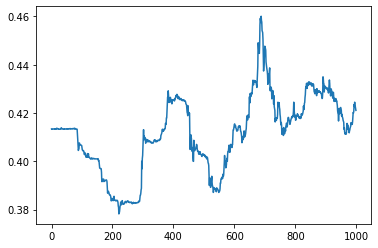

In [23]:
last_index = 1000
plt.plot(y[:last_index])
plt.plot(predictions[:last_index])

In [21]:
y

array([0.4134, 0.4135, 0.4133, ..., 0.7443, 0.7404, 0.7405])

In [22]:
predictions

array([0.40466806, 0.4065769 , 0.40495095, ..., 0.7506023 , 0.75069356,
       0.7474241 ], dtype=float32)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


KeyboardInterrupt: 

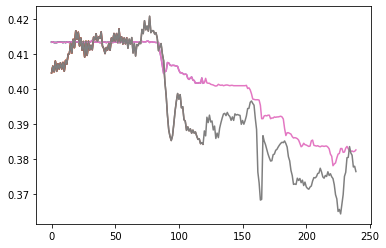

In [ ]:
import time
for i in range(8):
	index = 30*(2**i)
	
	X_predict = model.predict(X[:index])
	plt.plot(y[:index])
	plt.plot(X_predict[:index])


In [42]:
X.shape[0]/30

390.1333333333333